In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv('llps_plus.csv')
df.head()

,Sequence,Uniprot_ID
0,AGFQPQSQGMSLNDFQKQQKQAAPKPKKTLKLVSSSGIKLANATKK...,P05453
1,ASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDT...,P35637
2,CLRKKRKPQAEKVDVIAGSSKMKGFSSSESESSSESSSSDSEDSET...,O60885
3,DFDVYVLAKLLGFASEELQEEIEIIRDNVTDAFEACKPLLKKLMIE...,G5EBV6
4,EHHSGSQGPLLTTGDLGKEKTQKRVKEGNGTSNSTLSGPGLDSKPG...,Q15648


* **Turn every sequence into a list of "words".**

In [3]:
a = df['Sequence'][0]
a[:10]

'AGFQPQSQGM'

In [4]:
def split(a):
    li = []
    for i in range(len(a)-2):
        li.append(a[i:i+3])
    return li

In [5]:
split(a[:10])

['AGF', 'GFQ', 'FQP', 'QPQ', 'PQS', 'QSQ', 'SQG', 'QGM']

In [6]:
def list_of_list(df):
    li = []
    for i in df['Sequence']:
        li.append(split(i))
    return li

In [7]:
list_ready = list_of_list(df)

In [8]:
model = Word2Vec(list_ready, min_count=1, vector_size=200, workers=3, window =25, sg = 1)

In [9]:
model.wv['AGF']

array([-0.1275142 , -0.01576965, -0.05634982,  0.02052849, -0.02335078,
       -0.01450712,  0.13542205,  0.1382053 ,  0.06279629,  0.02277858,
       -0.10079385, -0.10216703,  0.08223658,  0.02042447, -0.10879134,
       -0.19353476,  0.19184062,  0.14299637, -0.07083549, -0.35484272,
        0.21740547, -0.16162413,  0.1566952 ,  0.05244585,  0.13519347,
       -0.3623077 ,  0.13425153,  0.01410956, -0.41087815, -0.24741313,
       -0.00070055, -0.09579449, -0.16424643,  0.00386855,  0.01962795,
       -0.11369668,  0.00315986, -0.06265814, -0.03353164,  0.01455961,
       -0.08443578, -0.03773576, -0.00840029,  0.07896632,  0.11941255,
       -0.11565246,  0.12334611, -0.23860414,  0.10358544,  0.21425094,
       -0.00253741,  0.04341565,  0.00971762, -0.03986861,  0.048883  ,
       -0.08821306, -0.10575729,  0.09801643, -0.26297405,  0.14085048,
        0.2316894 ,  0.03907551, -0.10864814,  0.07841324, -0.19118337,
        0.21216133,  0.02700089,  0.4567121 , -0.2566033 ,  0.35

In [10]:
model.wv['AGF'][-1]

0.012345011

In [11]:
a_split = split(a)
len(a_split)

569

In [12]:
l_plus = list(model.wv[a_split[0]])+list(model.wv[a_split[1]])
len(l_plus)

400

# Turn every sequence into a picture

In [13]:
def to_picture(dfs):
    set = []
    for j in range(len(dfs)):
        sq_split = split(dfs[j])
        sqq = []
        for i in range(len(sq_split)):
            sqq += list(model.wv[sq_split[i]])
        picture = np.array(sqq).reshape((int(len(sqq)/200),200))
        set.append(picture)
    return set

In [14]:
df1 = df['Sequence'][:5]
len(df1[0])

571

In [15]:
pic1 = to_picture(df1)
pic1[0][0] == model.wv['AGF']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Try to plot a picture

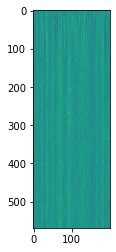

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython
plt.imshow(pic1[0])

# Split the training set and test set

In [27]:
full_positive = to_picture(df['Sequence'])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
len(full_positive)

137

In [43]:
full_positive = np.array(full_positive)

In [44]:
y_positive = np.ones(137)

In [45]:
X_posi_train, X_posi_test, y_posi_train, y_posi_test = train_test_split(full_positive, y_positive, test_size=0.33, random_state=42)

# Data size reshape

In [47]:
np.array(X_posi_train).shape

(91,)

In [48]:
for i in range(5):
    print(X_posi_train[i].shape)

(150, 200)
(447, 200)
(452, 200)
(622, 200)
(530, 200)


In [ ]:
img_width, img_height = 150, 200

#train_data_dir = '/yourdir/train'
#validation_data_dir = '/yourdir/validation'
nb_train_samples = 
nb_validation_samples = 
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')